In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
df = pd.read_excel('perola.xlsx')
df = df.drop(df.index[0])
df = df.drop(df.index[0])
df['Tempo"'] = df['Tempo"']/ 10**6
df['Acelereção'] = df['Acelereção']/ 10**6
df.head()


,"Tempo""",Acelereção
2,0.1,-0.004879
3,0.2,-0.004879
4,0.300001,-0.004879
5,0.400001,-0.004879
6,0.500001,-0.05787


In [5]:
mean = df['Acelereção'].mean()
std_dev = df['Acelereção'].std()
lower_bound = mean - 1.5 * std_dev
upper_bound = mean + 1.5 * std_dev
df = df[(df['Acelereção'] >= lower_bound) & (df['Acelereção'] <= upper_bound)]

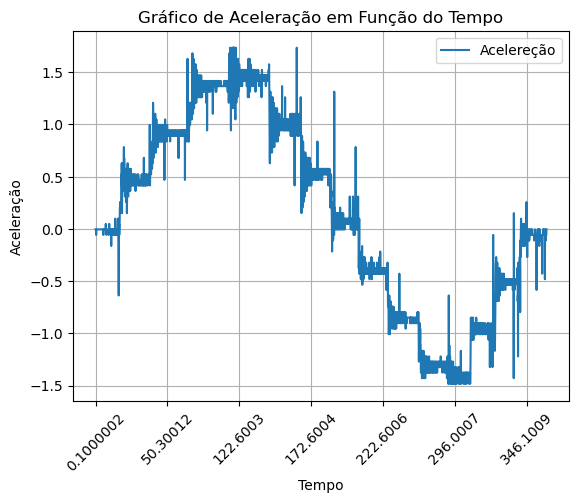

In [6]:
df.plot(x='Tempo"', y='Acelereção', kind='line')
plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Gráfico de Aceleração em Função do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
meio = len(df/2)
aceleração1 = df['Acelereção'][:meio]

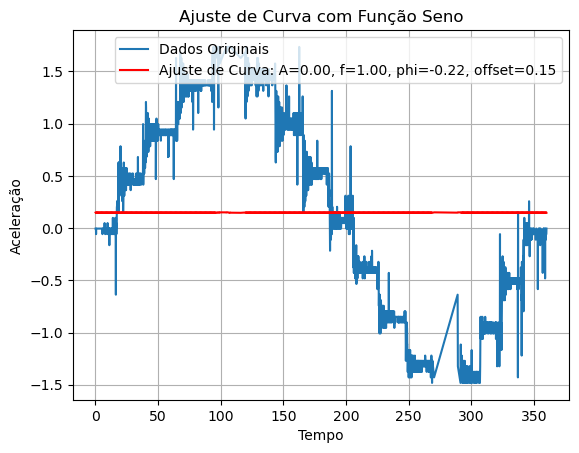

In [7]:
x = df['Tempo"'].astype(float)
y = df['Acelereção']

# Define a função seno que queremos ajustar aos dados
def sin_function(x, A, f, phi, offset):
    return A * np.sin(2 * np.pi * f * x + phi) + offset

# Ajusta a função seno aos dados
popt, pcov = curve_fit(sin_function, x, y)

# Extrai os parâmetros ajustados
A, f, phi, offset = popt

# Plota os dados originais
plt.plot(x, y, label='Dados Originais')

# Plota a função seno ajustada
plt.plot(x, sin_function(x, *popt), 'r-', label='Ajuste de Curva: A={:.2f}, f={:.2f}, phi={:.2f}, offset={:.2f}'.format(A, f, phi, offset))

plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Ajuste de Curva com Função Seno')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df2 = pd.read_excel('perolaqcai.xlsx')
df2['Tempo"'] = df2['Tempo"']/10**6
df2['Acelereção'] = df2['Acelereção']/10**6
df2.head()

,"Tempo""",Acelereção
0,0.100000,-0.004879
1,0.200000,-0.004879
2,0.300001,-0.004879
3,0.400001,-0.004879
4,0.500001,-0.004879


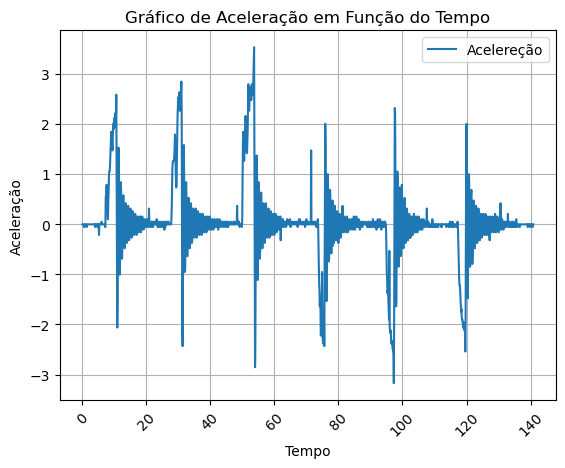

In [9]:
df2.plot(x='Tempo"', y='Acelereção', kind='line')
plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Gráfico de Aceleração em Função do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
df['Acelereção'] = df['Acelereção'].astype(float)
g = 10
w = 0.152  # 4 pesos de 38g cada, convertidos para kg
d = 0.07  # distância horizontal em metros (exemplo)
Delta =  0.82824  # deslocamento do modelo em kg (exemplo)
theta = 0.22  # cálculo simplificado para exemplo
# Calcular GM
GM = (w * d) / (Delta * theta)

print(f'GM transversal do modelo em escala: {GM:.4f} m')

# Analisar os dados de decaimento
# Ajustar uma função exponencial aos dados de decaimento
def exp_func(t, A, delta):
    return A * np.exp(-delta * t)

# Suponha que estamos ajustando a aceleração no eixo Y
popt, pcov = curve_fit(exp_func, df2['Tempo"'], df2['Acelereção'])

# Extrair a taxa de decaimento
A, delta = popt

# Calcular a frequência natural de roll
# I_zz = 1.3289  # momento de inércia em kg.m^2 (exemplo)
# omega_n = np.sqrt(g * GM / I_zz)

# print(f'Frequência natural de roll do modelo: {omega_n:.4f} rad/s')

# # Calcular o coeficiente de amortecimento
# zeta = delta / (2 * omega_n)

# print(f'Amortecimento do movimento de roll do modelo: {zeta:.4f}')

GM transversal do modelo em escala: 0.0584 m


Picos detectados:
102    2.208246
106    2.579178
299    2.526188
303    2.632168
309    2.841012
509    2.155255
518    2.788022
523    2.735032
526    2.685158
529    2.788022
531    2.685158
536    3.526769
975    2.314226
Name: Acelereção, dtype: float64


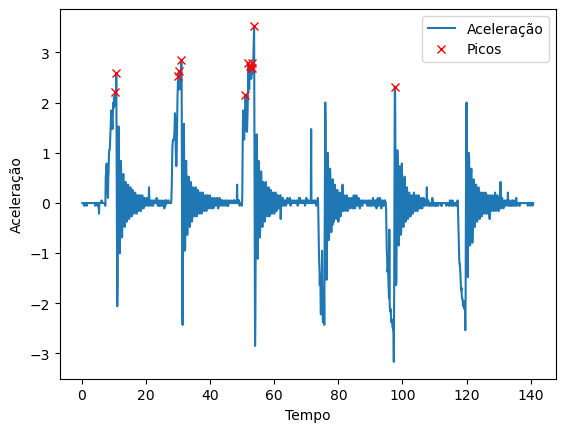

0.003906396260720414 0.15016576219628433


In [11]:
from scipy.signal import find_peaks
# Detectar picos na coluna 'aceleracao'
picos, _ = find_peaks(df2['Acelereção'], height=2)

# Obter os valores dos picos
valores_picos =df2['Acelereção'].iloc[picos]

# Exibir os valores dos picos
print("Picos detectados:")
print(valores_picos)

# Plotar a série temporal da aceleração e marcar os picos detectados
plt.plot(df2['Tempo"'], df2['Acelereção'], label='Aceleração')
plt.plot(df2['Tempo"'].iloc[picos], df2['Acelereção'].iloc[picos], 'rx', label='Picos')
plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.legend()
plt.show()
zeta = np.mean(np.diff(np.log(df2['Acelereção'].iloc[picos].values)))
zeta2 = delta / np.sqrt(4 * np.pi**2 + delta**2)
print(zeta,zeta2)

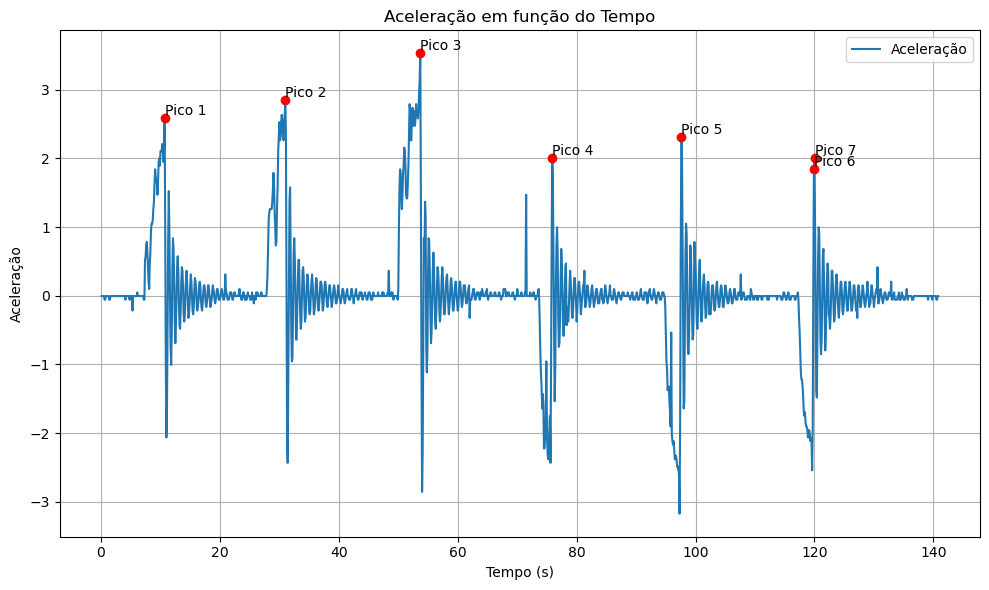

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Tempo"'], df2['Acelereção'], label='Aceleração')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração')
plt.title('Aceleração em função do Tempo')
plt.grid(True)
plt.legend()

# Identificando picos a cada 20 segundos
intervalo = 20  # intervalo de tempo para identificar picos (em segundos)
num_picos = int(df2['Tempo"'].max() / intervalo)  # número de picos esperados

for i in range(num_picos):
    t_min = i * intervalo
    t_max = (i + 1) * intervalo
    idx_pico = df2[(df2['Tempo"'] >= t_min) & (df2['Tempo"'] < t_max)]['Acelereção'].idxmax()
    pico_tempo = df2.loc[idx_pico, 'Tempo"']
    pico_aceleracao = df2.loc[idx_pico, 'Acelereção']
    plt.plot(pico_tempo, pico_aceleracao, 'ro')  # marcando o pico no gráfico
    plt.text(pico_tempo, pico_aceleracao, f'Pico {i+1}', fontsize=10, verticalalignment='bottom')

plt.tight_layout()
plt.show()

Logaritmos decrementais entre os picos: [-0.004763021924125717, -0.009525169663781531, 0.0255645488639863, -0.006738586071466964, 0.010272440989419174, -0.8284839573037509]
coeficientes_amortecimento [-0.0007580582654696088, -0.0015159760937811595, 0.004068690642151695, -0.0010724786659355259, 0.0016349075760906278, -0.13072579183686728]
Valor médio do coeficiente de amortecimento: -0.02139478444063521


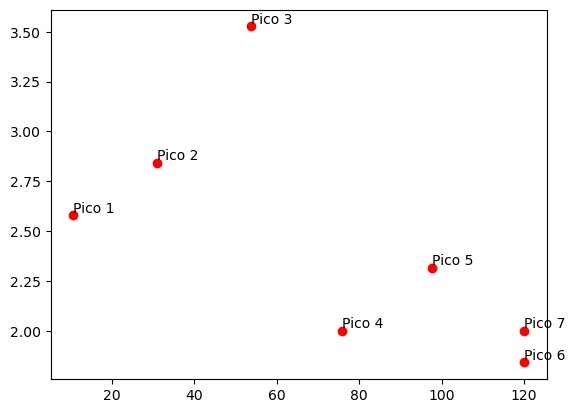

In [15]:
# Identificando picos a cada 20 segundos
intervalo = 20  # intervalo de tempo para identificar picos (em segundos)
num_picos = int(df2['Tempo"'].max() / intervalo)  # número de picos esperados

picos = []
for i in range(num_picos):
    t_min = i * intervalo
    t_max = (i + 1) * intervalo
    idx_pico = df2[(df2['Tempo"'] >= t_min) & (df2['Tempo"'] < t_max)]['Acelereção'].idxmax()
    pico_tempo = df2.loc[idx_pico, 'Tempo"']
    pico_aceleracao = df2.loc[idx_pico, 'Acelereção']
    plt.plot(pico_tempo, pico_aceleracao, 'ro')  # marcando o pico no gráfico
    plt.text(pico_tempo, pico_aceleracao, f'Pico {i+1}', fontsize=10, verticalalignment='bottom')
    picos.append((pico_tempo, pico_aceleracao))

# Calculando o logaritmo decremental entre os picos
log_decremental = []
for i in range(len(picos) - 1):
    A_i = picos[i][1]
    A_ip1 = picos[i + 1][1]
    delta_t = picos[i + 1][0] - picos[i][0]
    delta = 1 / delta_t * np.log(A_i / A_ip1)
    log_decremental.append(delta)

print("Logaritmos decrementais entre os picos:", log_decremental)
coeficientes_amortecimento = []
for delta in log_decremental:
    zeta = delta / np.sqrt(4 * np.pi**2 + delta**2)
    coeficientes_amortecimento.append(zeta)
print("coeficientes_amortecimento", coeficientes_amortecimento)
media_zeta = np.mean(coeficientes_amortecimento)

print("Valor médio do coeficiente de amortecimento:", media_zeta)